In [1]:
using LinearAlgebra
using PyPlot
using DataFrames
using CSV

In [2]:
PyPlot.svg(true)

true

In [16]:
include("../src/tmat.jl")
include("../src/latt_para.jl")
include("../src/tmat_nlo.jl")
include("../src/coupling.jl")

coupling_1sigma_LO! (generic function with 1 method)

# Pole structure of $\Lambda(1405)$ in physical coupled channels

In [4]:
# average mass of baryons unit: GeV
mN = (938.272 + 939.566) / 2 
mΣ = (1189.37 + 1192.64 + 1197.45) / 3 
mΛ = 1115.68 
mΞ = (1314.8+1321.3) / 2 

# average mass of mesons unit: MeV
mKbar = (493.68 + 497.65) / 2 
mπ = (139.570*2 + 134.977) / 3
mK = mKbar 
mη = 547.51
mch_phy = [(mπ, mΣ), (mK, mN), (mη, mΛ), (mK, mΞ)]
params_phy = Dict(
    :mch => mch_phy,
    :decons_vec => [92.4, 92.4, 92.4, 92.4] * 1.15,
    :threshold => [sum(mch_phy[i]) for i in 1:4],
    :mπ => mπ
)
aa = [-2, -2, -2.25, -2.52];
params_phy

Dict{Symbol, Any} with 4 entries:
  :threshold  => [1331.19, 1434.58, 1663.19, 1813.71]
  :decons_vec => [106.26, 106.26, 106.26, 106.26]
  :mch        => [(138.039, 1193.15), (495.665, 938.919), (547.51, 1115.68), (4…
  :mπ         => 138.039

In [5]:
function pole_depen_phy_mπ!(params, a; pole::Int=1)
    pphy = pole_LO!(pole == 1 ? [params[:threshold][1], -40e0] : [params[:threshold][2], -10e0], params, aa, n=2)
    pphy1 = [pphy[1]- (pole == 1 ? params[:threshold][1] : params[:threshold][2]), pphy[2] ]
    return DataFrame(redp=[pphy1[1]], rep=[pphy[1]], imp=[pphy[2]] )
end



pole_depen_phy_mπ! (generic function with 1 method)

In [6]:
p1phy = pole_depen_phy_mπ!(params_phy, aa)

Row,redp,rep,imp
,Float64,Float64,Float64
1,64.5355,1395.73,-63.3379


In [7]:
p2phy = pole_depen_phy_mπ!(params_phy, aa, pole=2)

Row,redp,rep,imp
,Float64,Float64,Float64
1,-4.76827,1429.82,-22.187


In [8]:
hd = DataFrame(CSV.File("./latt_meson_baryon_decons.csv") )

Row,pi,K,eta,N,Lambda,Sigma,Xi,fpi,fK,feta
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,130.0,497.05,556.39,961.33,1111.87,1185.44,1299.11,91.12,109.96,119.14
2,133.1,496.78,555.92,962.85,1112.63,1185.85,1298.94,91.29,110.01,119.11
3,136.21,496.5,555.44,964.4,1113.4,1186.27,1298.76,91.47,110.05,119.08
4,139.31,496.21,554.95,965.97,1114.18,1186.68,1298.56,91.64,110.1,119.05
5,142.41,495.92,554.45,967.57,1114.96,1187.09,1298.35,91.82,110.14,119.02
6,145.52,495.62,553.93,969.18,1115.75,1187.5,1298.12,92.0,110.19,118.99
7,148.62,495.31,553.4,970.82,1116.55,1187.91,1297.89,92.18,110.23,118.96
8,151.72,494.99,552.86,972.48,1117.35,1188.31,1297.64,92.36,110.28,118.93
9,154.83,494.67,552.3,974.16,1118.16,1188.72,1297.37,92.55,110.33,118.89


In [9]:
function params_set_st1!(hd, index)
    mch = [(hd[!, :pi][index], hd[!, :Sigma][index]), (hd[!, :K][index], hd[!, :N][index]), (hd[!, :eta][index], hd[!, :Lambda][index]), (hd[!, :K][index], hd[!, :Xi][index])]
    params = Dict(
        :mch => mch,
        :decons_vec => [92.4, 92.4, 92.4, 92.4] * 1.15,
        #:decons_vec => [hd[!, :fpi][index], hd[!, :fK][index]],
        :threshold => [sum(mch[i]) for i in 1:2]
    )
    return params
end

function params_set_st2!(hd, index)
    mch = [(hd[!, :pi][index], hd[!, :Sigma][index]), (hd[!, :K][index], hd[!, :N][index])]
    fπ, fK, fη = hd[!, :fpi][index], hd[!, :fK][index], hd[!, :feta][index]
    params = Dict(
        :mch => mch,
        :decons_vec => [fπ, fK, fη, fK],
        #:decons_vec => [hd[!, :fpi][index], hd[!, :fK][index]],
        :threshold => [sum(mch[i]) for i in 1:2]
    )
    return params
end

params_set_st2! (generic function with 1 method)

In [10]:
a = [-2e0, -2e0, -2.25, -2.52]

4-element Vector{Float64}:
 -2.0
 -2.0
 -2.25
 -2.52

In [11]:
function pole_depen_of_mπ_st1!(lattice_mass_df, a::Vector; n=2, pole::Int=1, path=false)
    pp = []
    len = size(lattice_mass_df)[1]
    for i in 1:len
        params = params_set_st1!(lattice_mass_df, i)
        th = params[:threshold]
        p = pole_LO!([th[pole], pole == 1 ? -40e0 : -10e0], params, a, n=n)
        append!(pp, p[1]-th[pole] + p[2]*1im)
    end
    df = DataFrame(mπ=lattice_mass_df.pi, redp=real(pp), imp=imag(pp) )
    if path != false
        CSV.write(path, df)
    end
    return df
end

function pole_depen_of_mπ_st2!(lattice_mass_df, a::Vector; pole::Int=1)
    pp = []
    len = size(lattice_mass_df)[1]
    for i in 1:len
        params = params_set_st2!(lattice_mass_df, i)
        th = params[:threshold]
        p = pole_LO!([th[pole], pole == 1 ? -40e0 : -10e0], params, a)
        append!(pp, p[1]-th[pole] + p[2]*1im)
    end
    df = DataFrame(mπ=lattice_mass_df.pi, redp=real(pp), imp=imag(pp) )
    
    return df
end
function plot_pole_depen_phy_mπ!(ax, redp, imp; label="physical lower pole", marker="o")
    ax.scatter(redp, imp, s=90, marker=marker, label=label)
end

function plot_pole_depen_mπ!(ax, mπ, redp, imp; label="lower pole", xlabel=L"$Re[z_R] - m_{\pi\Sigma}$ [MeV]", marker="s", letitle="2 channels")
    ymin = minimum(imp) - 0.1
    ymax = maximum(imp)
    sca = ax.scatter(redp, imp, c=mπ, s=80, cmap=:plasma, marker=marker, label=label)# RdYlBu
    ax.vlines(0, ymin, ymax, color=:gray, linestyle=:dashed)
    ax.set(xlabel=xlabel, ylabel=L"$Im[z_R]$ [MeV]", ylim=(ymin, ymax) )
    ax.legend(title=letitle)
    return sca
end

plot_pole_depen_mπ! (generic function with 1 method)

In [12]:
p1 = pole_depen_of_mπ_st1!(hd, a, path="./out/lower_pole_depen_mpi.csv")
p2 = pole_depen_of_mπ_st1!(hd, a, pole=2, path="./out/higher_pole_depen_mpi.csv");

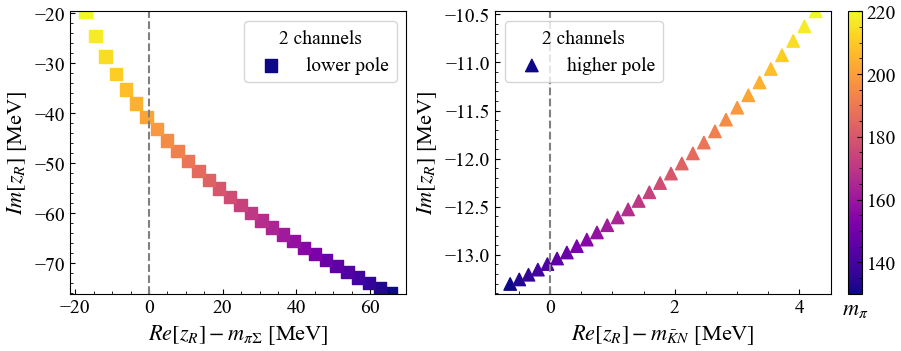

In [13]:
fig, ax = PyPlot.subplots(1, 2, figsize=(9, 3.5), layout="constrained")#, tight_layout=true)
#plot_pole_depen_phy_mπ!(ax[1], p1phy.redp, p1phy.imp)
#plot_pole_depen_phy_mπ!(ax[2], p2phy.redp, p2phy.imp, label="physical higher pole")
plot_pole_depen_mπ!(ax[1], p1.mπ, p1.redp, p1.imp)
ax2 = plot_pole_depen_mπ!(ax[2], p2.mπ, p2.redp, p2.imp, marker="^", label="higher pole", xlabel=L"$Re[z_R]-m_{\bar{K}N}$ [MeV]")
clb = fig.colorbar(ax2, ax=ax[2])
clb.ax.set(xlabel=L"m_\pi")
#fig.savefig("../figure/lambda1405_dependence_of_mpi.pdf")

gcf()

In [14]:
pp1 = pole_depen_of_mπ_st1!(hd, a, n=4)
pp2 = pole_depen_of_mπ_st1!(hd, a, pole=2, n=4)

Row,mπ,redp,imp
,Float64,Float64,Float64
1,130.0,-12.8985,-16.6115
2,133.1,-12.758,-16.6326
3,136.21,-12.6143,-16.6532
4,139.31,-12.4655,-16.6703
5,142.41,-12.3146,-16.6834
6,145.52,-12.1605,-16.6977
7,148.62,-12.0026,-16.7077
8,151.72,-11.8407,-16.7142
9,154.83,-11.6776,-16.7205


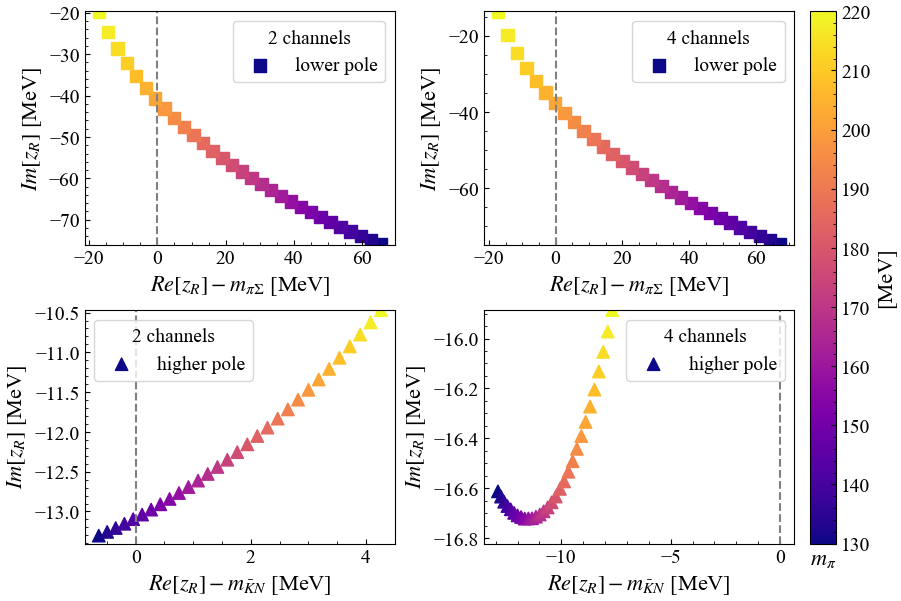

In [15]:
fig, ax = PyPlot.subplots(2, 2, figsize=(9, 6), layout="constrained")#, tight_layout=true)
plot_pole_depen_mπ!(ax[1, 1], p1.mπ, p1.redp, p1.imp)
ax2 = plot_pole_depen_mπ!(ax[2, 1], p2.mπ, p2.redp, p2.imp, marker="^", label="higher pole", xlabel=L"$Re[z_R]-m_{\bar{K}N}$ [MeV]")


#fig, ax = PyPlot.subplots(1, 2, figsize=(9, 3.5), layout="constrained")#, tight_layout=true)
plot_pole_depen_mπ!(ax[1, 2], pp1.mπ, pp1.redp, pp1.imp, letitle="4 channels")
plot_pole_depen_mπ!(ax[2, 2], pp2.mπ, pp2.redp, pp2.imp, marker="^", label="higher pole", xlabel=L"$Re[z_R]-m_{\bar{K}N}$ [MeV]", letitle="4 channels")

clb = fig.colorbar(ax2, ax=[ax[1,2], ax[2, 2]])
clb.ax.set(xlabel=L"$m_\pi$", ylabel="[MeV]")
fig.savefig("../figure/lambda1405_dependence_of_mpi_4channels.pdf")
gcf()

# Include coupling

In [65]:
function coupling_depen_mπ!(lattice_mass_df, a::Vector; n=2, pole=1)
    poledf = pole_depen_of_mπ_st1!(lattice_mass_df, a, n=n, pole=pole)
    len = size(lattice_mass_df)[1]
    gs = []
    df = n == 2 ? DataFrame([[] []], [:gs11, :gs22]) : DataFrame([[] [] [] []], [:gs11, :gs22, :gs33, :gs44])

    for i in 1:len
        params = params_set_st1!(lattice_mass_df, i)
        th = params[:threshold]
        p = pole_LO!([th[pole], pole == 1 ? -40e0 : -10e0], params, a, n=n)
        df_coupling = df_coupling_LO!(p, params, a, n=n)
        df = vcat(df, df_coupling)
    end
    return insertcols!(df, 1, :mπ => hd.pi)
end

function plot_g_depen_mπ!(ax, coupling::AbstractDataFrame; g=:gs11, pole=1, nch=2, label=nothing)
    
    ax.plot(coupling.mπ, sqrt.(coupling[!, g]), label=label)
end

plot_g_depen_mπ! (generic function with 1 method)

In [43]:
pL2ch_coupling = coupling_depen_mπ!(hd, aa)
pH2ch_coupling = coupling_depen_mπ!(hd, aa, pole=2);

In [45]:
pL4ch_coupling = coupling_depen_mπ!(hd, aa, n=4)
pH4ch_coupling = coupling_depen_mπ!(hd, aa, pole=2, n=4);

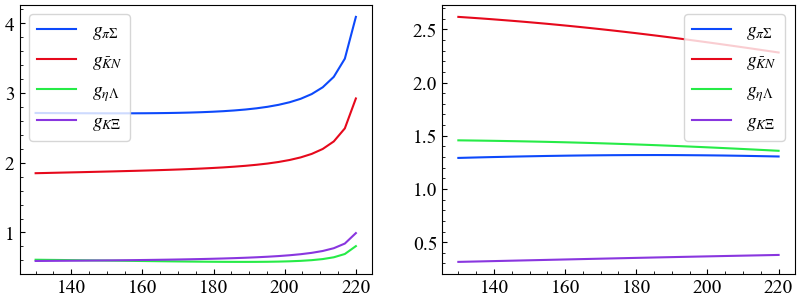

In [74]:
fig, ax = PyPlot.subplots(1, 2, figsize=(10, 3.5))
gg = [:gs11, :gs22, :gs33, :gs44]
label = [L"$g_{\pi\Sigma}$", L"$g_{\bar{K}N}$", L"$g_{\eta\Lambda}$", L"$g_{K\Xi}$"]
[plot_g_depen_mπ!(ax[1], pL4ch_coupling, g=gg1, nch=4, label=label1) for (gg1, label1) in zip(gg, label)]
[plot_g_depen_mπ!(ax[2], pH4ch_coupling, g=gg1, nch=4, label=label1) for (gg1, label1) in zip(gg, label)]
#plot_g_depen_mπ!(ax, pL4ch_coupling, g=:gs22)

#plot_g_depen_mπ!(ax, pH2ch_coupling)
#plot_g_depen_mπ!(ax, pH2ch_coupling, g=:gs22, label=L"")
ax[1].legend()
ax[2].legend()
gcf()

In [68]:
fig
gcf()

Figure(PyObject <Figure size 640x480 with 1 Axes>)